# K-Means Clustering: Flower Images
#### Eric Zander (ericzander.ml@gmail.com)

---

> K-means clustering has a couple applications in image processing. This includes basic segmentation and image compression. Using basic images of various flowers, you can get an idea of how both these applications work here.

*Data Source: https://www.kaggle.com/olgabelitskaya/flower-color-images*

---

## Table of Contents

- [Setup](#chapter1)
- [Color Clustering and Segmentation](#chapter2)
- [Vector Quantization and Compression](#chapter3)

---

## 1. Setup <a class="anchor" id="chapter1"></a>

***Import Packages***

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import imageio
import glob

In [2]:
# Import custom k-means module
import sys
sys.path.append('../')
from kmeans import kmeans

***Load Data***

In [3]:
# Save flower pngs in numpy arrays using imageio
flowers = []

for filename in glob.glob('Flowers/Images/*.png'):
    # Read and save only first three RGB channels
    flowers.append(imageio.imread(filename)[:,:,:3])

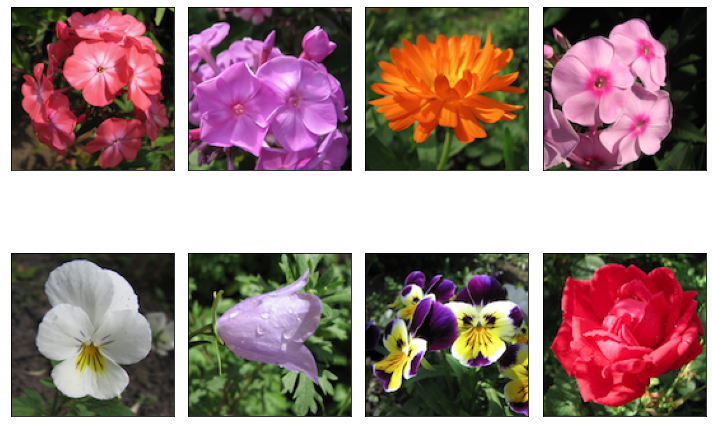

In [4]:
# Show flowers
fig, axes = plt.subplots(2, 4, figsize=(10, 8))

for i, ax in enumerate(axes.reshape(-1)):
    ax.imshow(flowers[i])
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

> Each flower is a .png with 4 channels (R, G, B, and alpha). However, we have removed the alpha channel, leaving us with a list of 8 images with 3 channels.

## 2. Color Clustering and Segmentation <a class="anchor" id="chapter2"></a>

***Preprocessing for Clustering***

In [5]:
# Reshape images for clustering
flowers_r = [flower.reshape(-1, 3) for flower in flowers]

In [6]:
# Normalize values (range normalization from 0 to 1)
for i in range(len(flowers_r)):
    fmin = flowers_r[i].min()
    fmax = flowers_r[i].max()
    flowers_r[i] = (flowers_r[i] - fmin) / (fmax - fmin)

***Cluster a Flower with k=6***

In [7]:
# Save the first flower
test_flower = flowers_r[0]

In [8]:
# Cluster and save results in array of same shape
km = kmeans(k=6)
flower_colors = km.fit(test_flower, seed=0)

***Display Results***

In [9]:
# Change cluster labels to unique RGB colors
flower_colors = km.centroids[km.labels]
flower_colors

array([[0.10453501, 0.10427567, 0.06407326],
       [0.10453501, 0.10427567, 0.06407326],
       [0.10453501, 0.10427567, 0.06407326],
       ...,
       [0.10453501, 0.10427567, 0.06407326],
       [0.10453501, 0.10427567, 0.06407326],
       [0.50155815, 0.13477383, 0.18362136]])

In [10]:
# Reshape color arrays
original_shape = flowers[0].shape
out = flower_colors.reshape(original_shape)

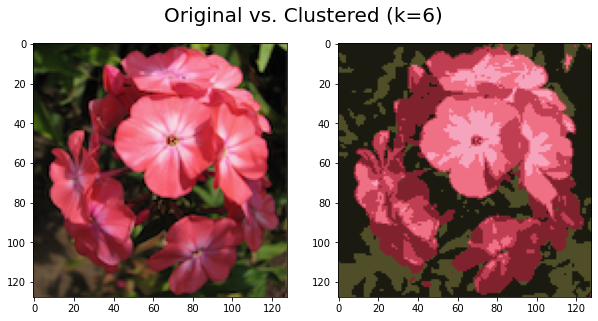

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.imshow(flowers[0])
ax2.imshow(out)
plt.suptitle("Original vs. Clustered (k=6)", y=0.88, fontsize=20)
plt.show()

> Heres what clustering with 6 unique colors looks like. Let's streamline the process to look at more examples.

***Streamlining Clustering***

In [12]:
def cluster_image(image, k):
    """Clusters image given a value of k."""
    # Reshape
    img = image.reshape(-1, 3)
    
    # Scale to 0-1
    vmin = img.min()
    img = (img - vmin) / (img.max() - vmin)
    
    # Cluster
    km = kmeans(k=k)
    clusters = km.fit(img, seed=0)
    
    # Convert cluster labels to unique colors
    img = km.centroids[km.labels]
    
    # Reshape output to original shape and return
    original_shape = image.shape
    return img.reshape(original_shape)

In [13]:
def plot_flowers(original, clustered, title):
    """Plots a flower vs. its clustered version."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
    ax1.imshow(original)
    ax2.imshow(clustered)
    plt.suptitle(title, y=0.88, fontsize=20)
    plt.show()

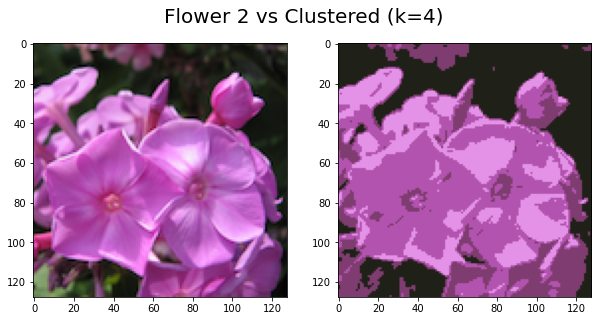

In [14]:
# Test on second flower with k=4
kflower = cluster_image(flowers[1], 4)

# Show image
plot_flowers(flowers[1], kflower, "Flower 2 vs Clustered (k=4)")

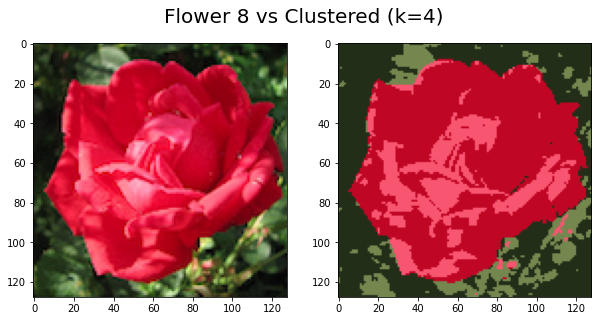

In [15]:
# Test on second flower with k=4
kflower = cluster_image(flowers[7], 4)

# Show image
plot_flowers(flowers[7], kflower, "Flower 8 vs Clustered (k=4)")

> Here you can see the effects of clustering an image based on color. This gives an idea of where the flowers are, as the color clusters that are not part of the flowers can be easily identified and floored. However, this type of image segmentation only works in certain situations, as dealing with images with similar colors can be tricky even when identifying a decent value of k to use. k-means clustering does have another important application in image processing though, and that lies in compression.

## 3. Vector Quantization and Compression <a class="anchor" id="chapter3"></a>

> Having an image with fewer colors can aid in compression, allowing for smaller image files. However, resolution is also lost if files are to compressed. With k-means clustering, we can choose the number of colors an image should have prior to performing compression by clustering with different values of k.

In [16]:
def compress(image):
    """Clusters and plots for 5 different values of k."""
    kvals = [2 ** (i + 1) for i in range(5)]
    fig, axes = plt.subplots(1, 5, figsize=(10, 8), dpi=300)
    
    for i, ax in enumerate(axes.reshape(-1)):
        cimg = cluster_image(image, kvals[i])
        ax.imshow(cimg)
        ax.set_title("k={}".format(kvals[i]))
        ax.set_xticks([])
        ax.set_yticks([])
                
    plt.tight_layout()
    plt.show()

***Compress All Flowers***

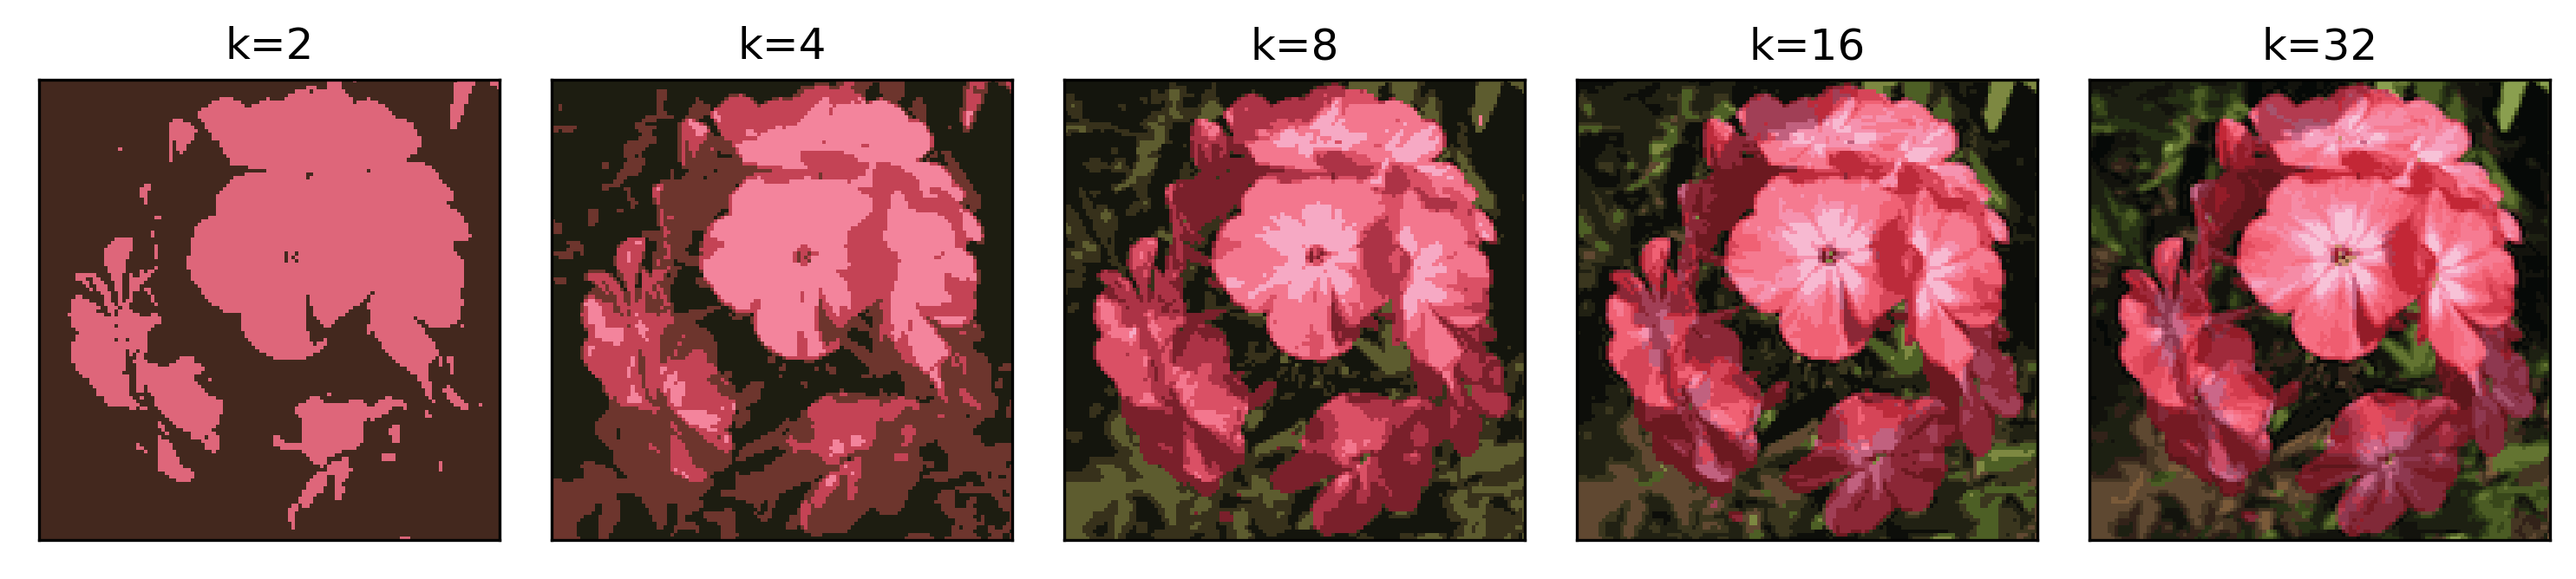

In [17]:
compress(flowers[0])

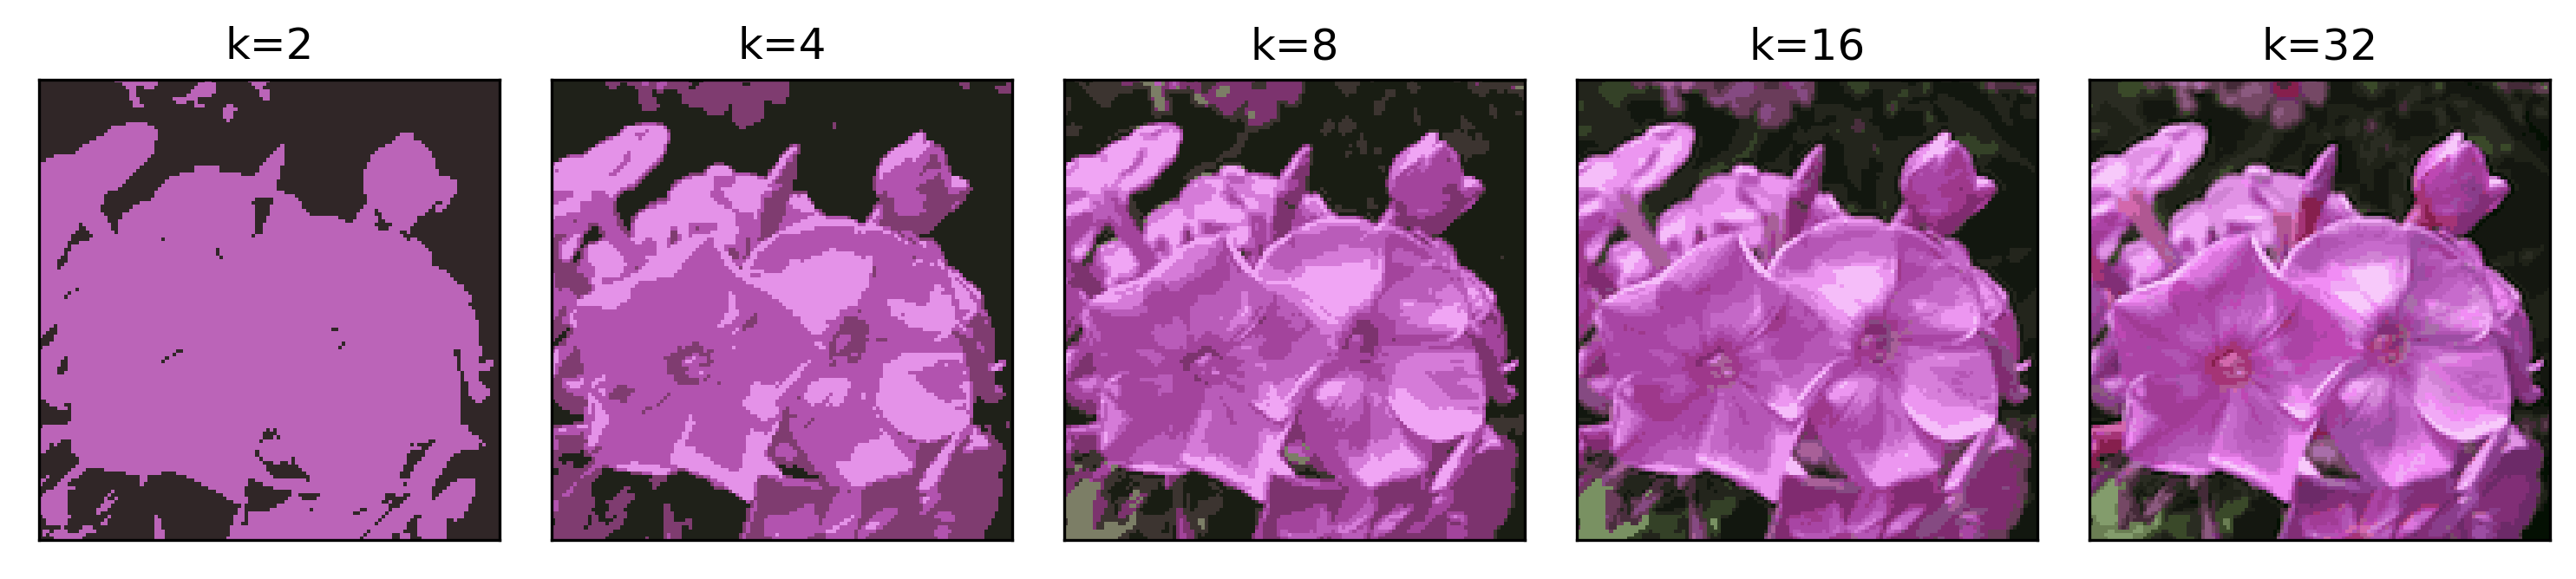

In [18]:
compress(flowers[1])

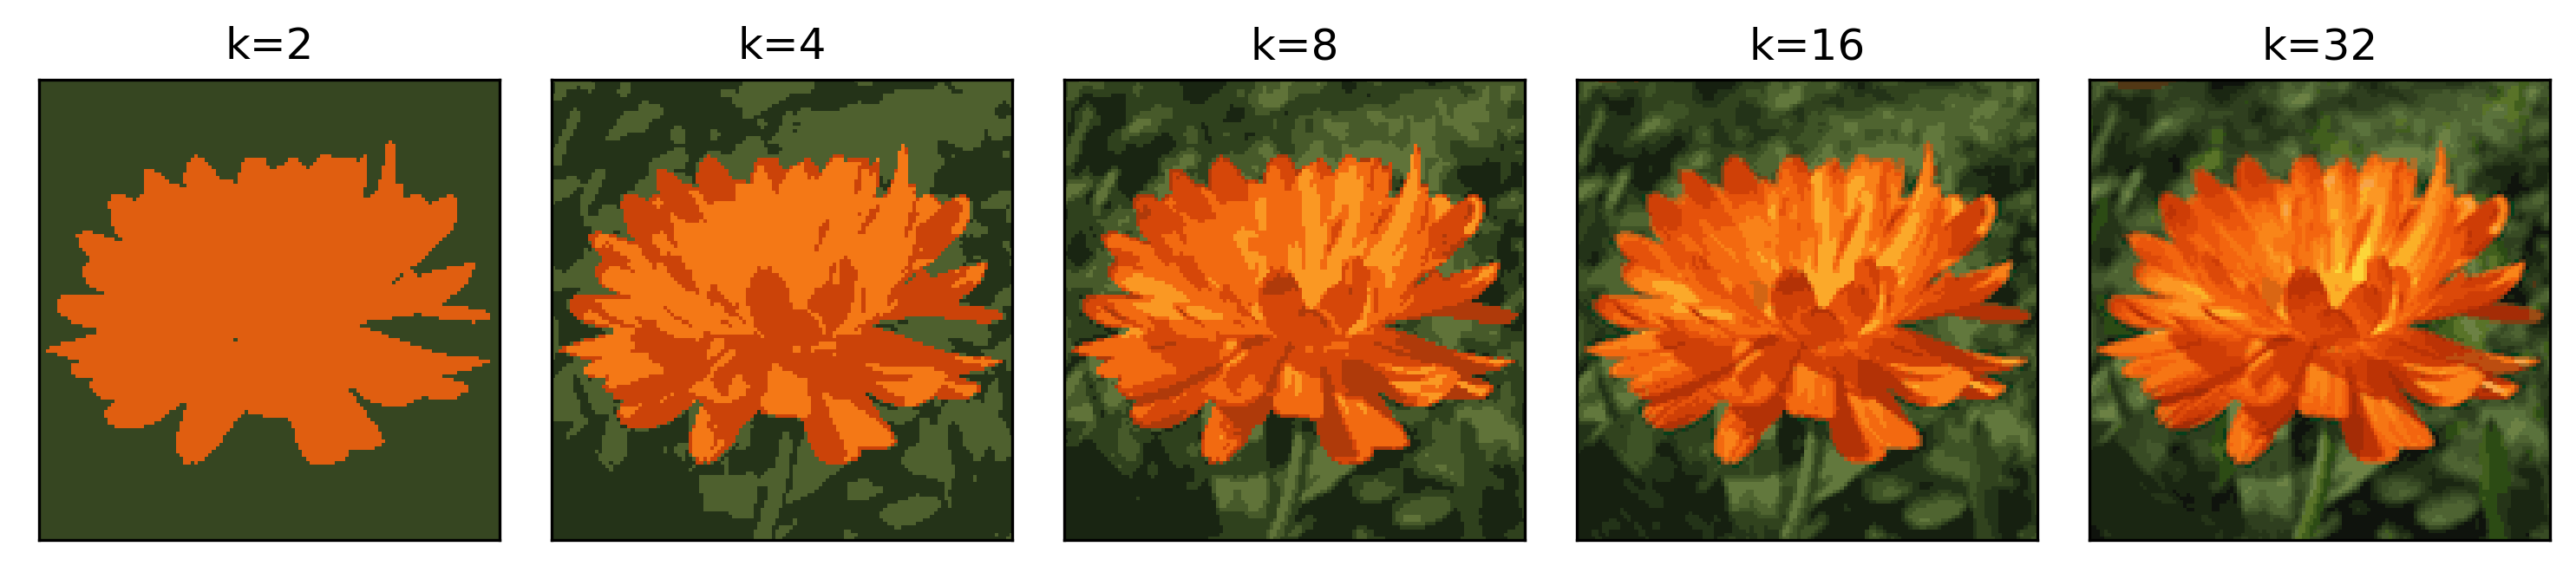

In [19]:
compress(flowers[2])

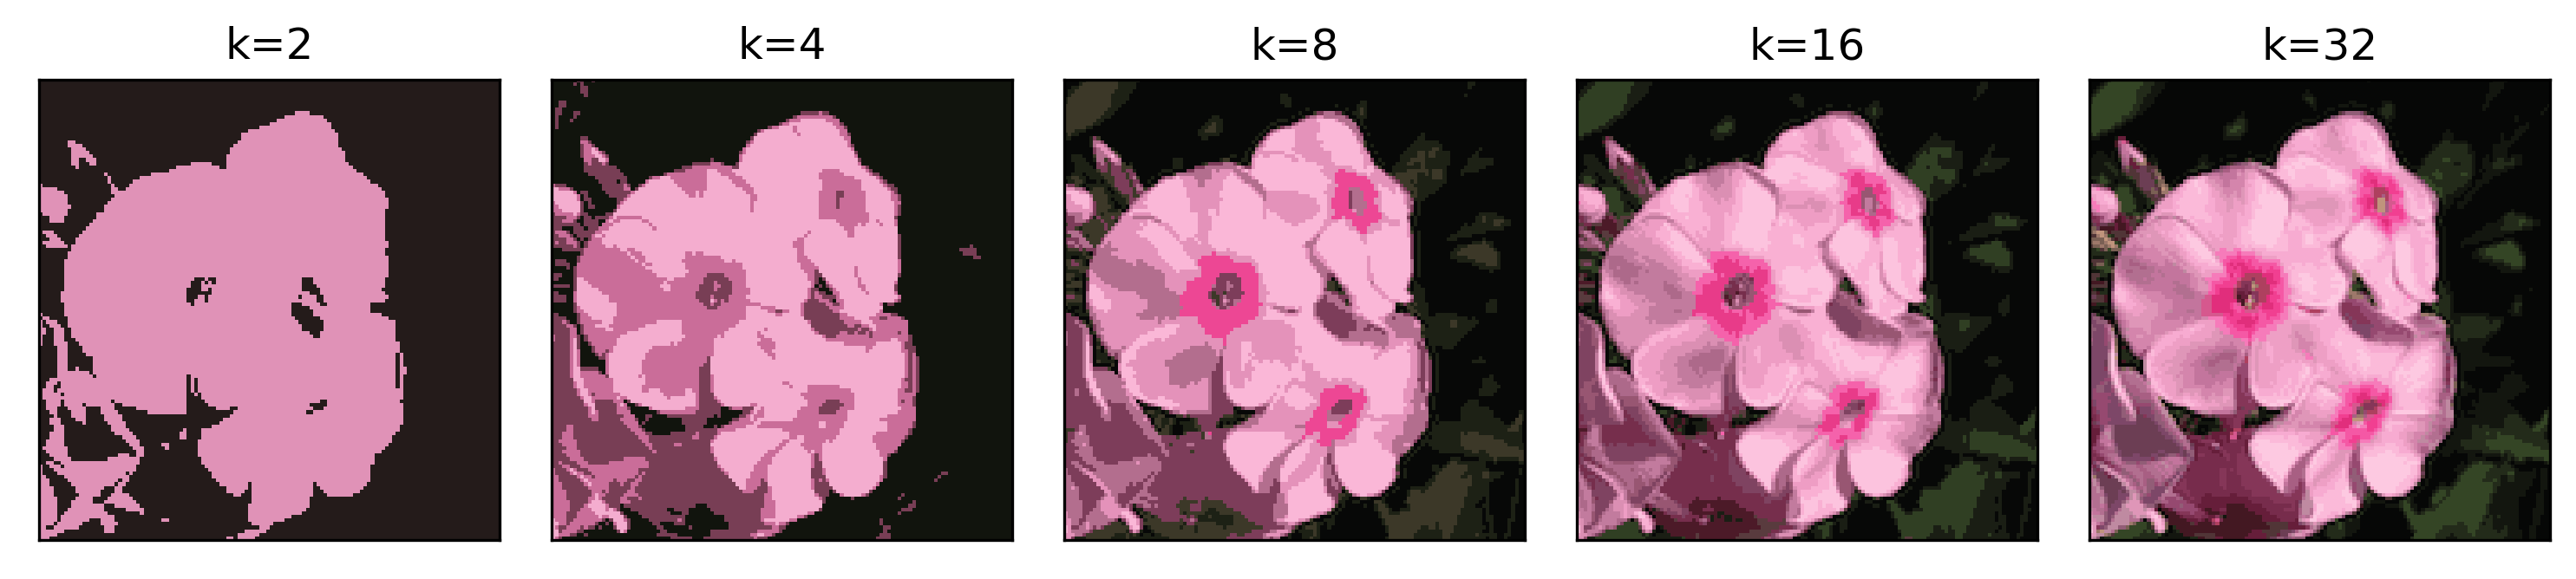

In [20]:
compress(flowers[3])

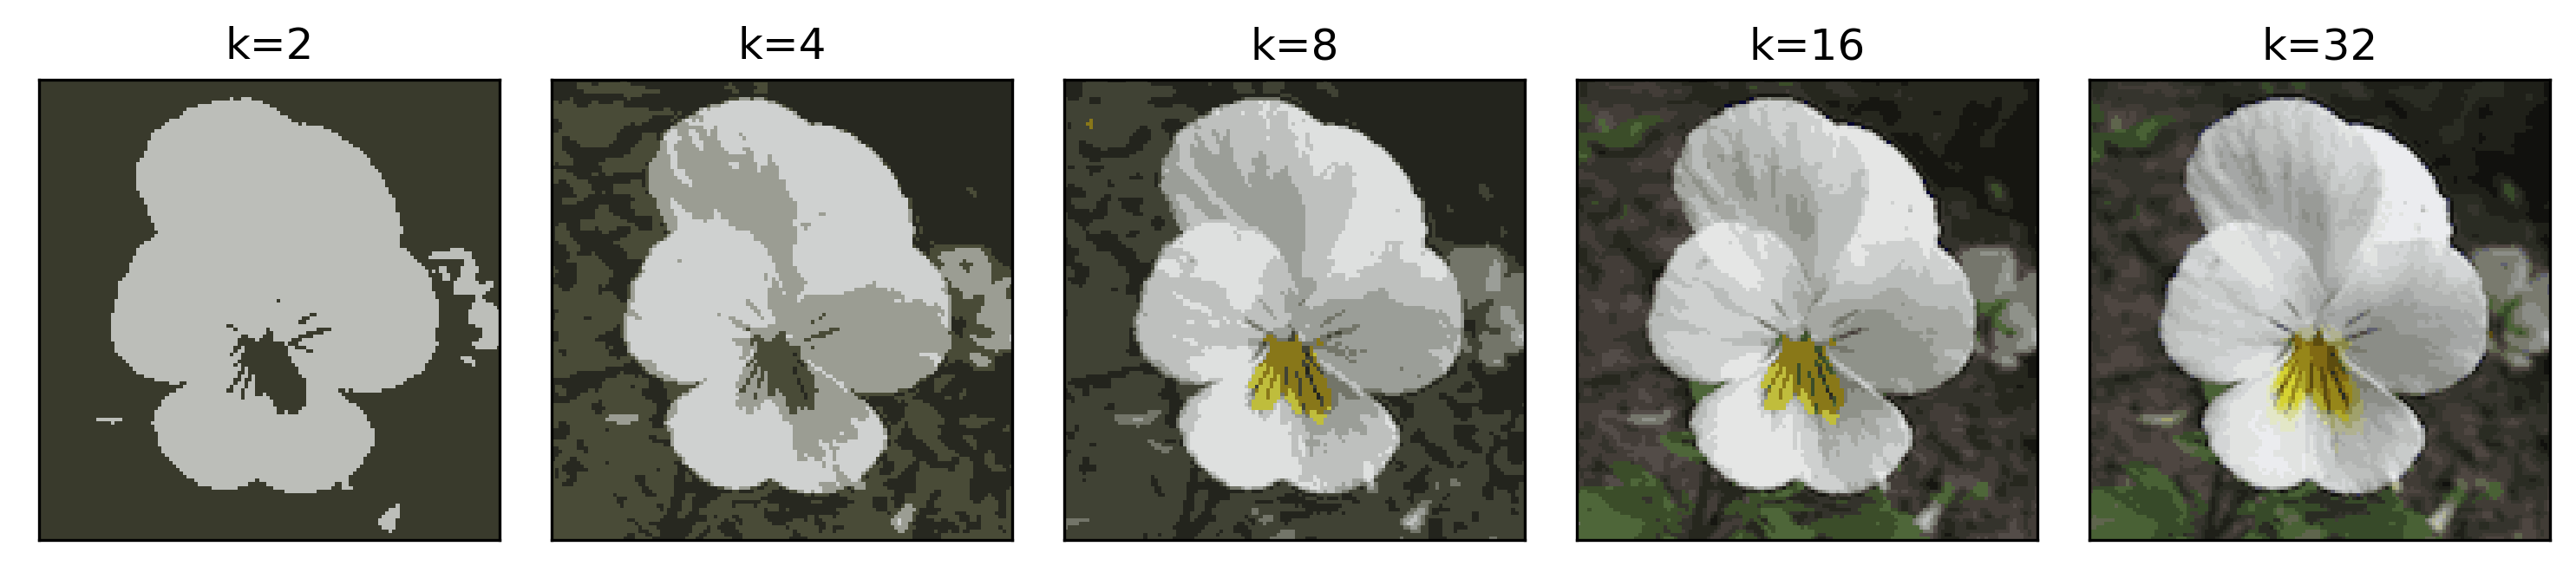

In [21]:
compress(flowers[4])

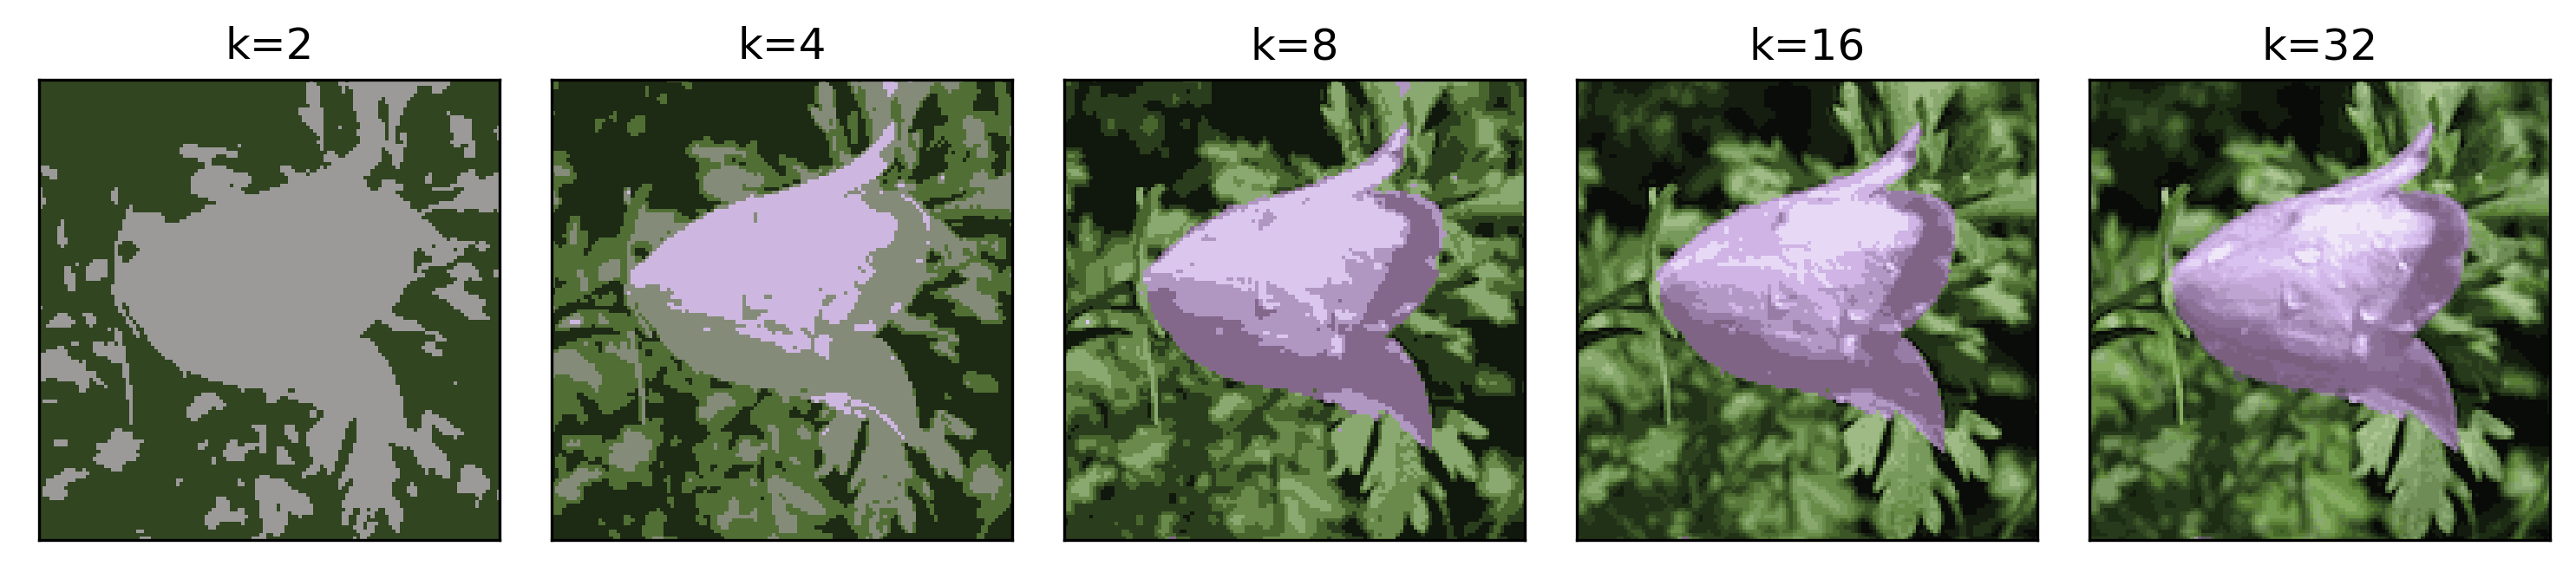

In [22]:
compress(flowers[5])

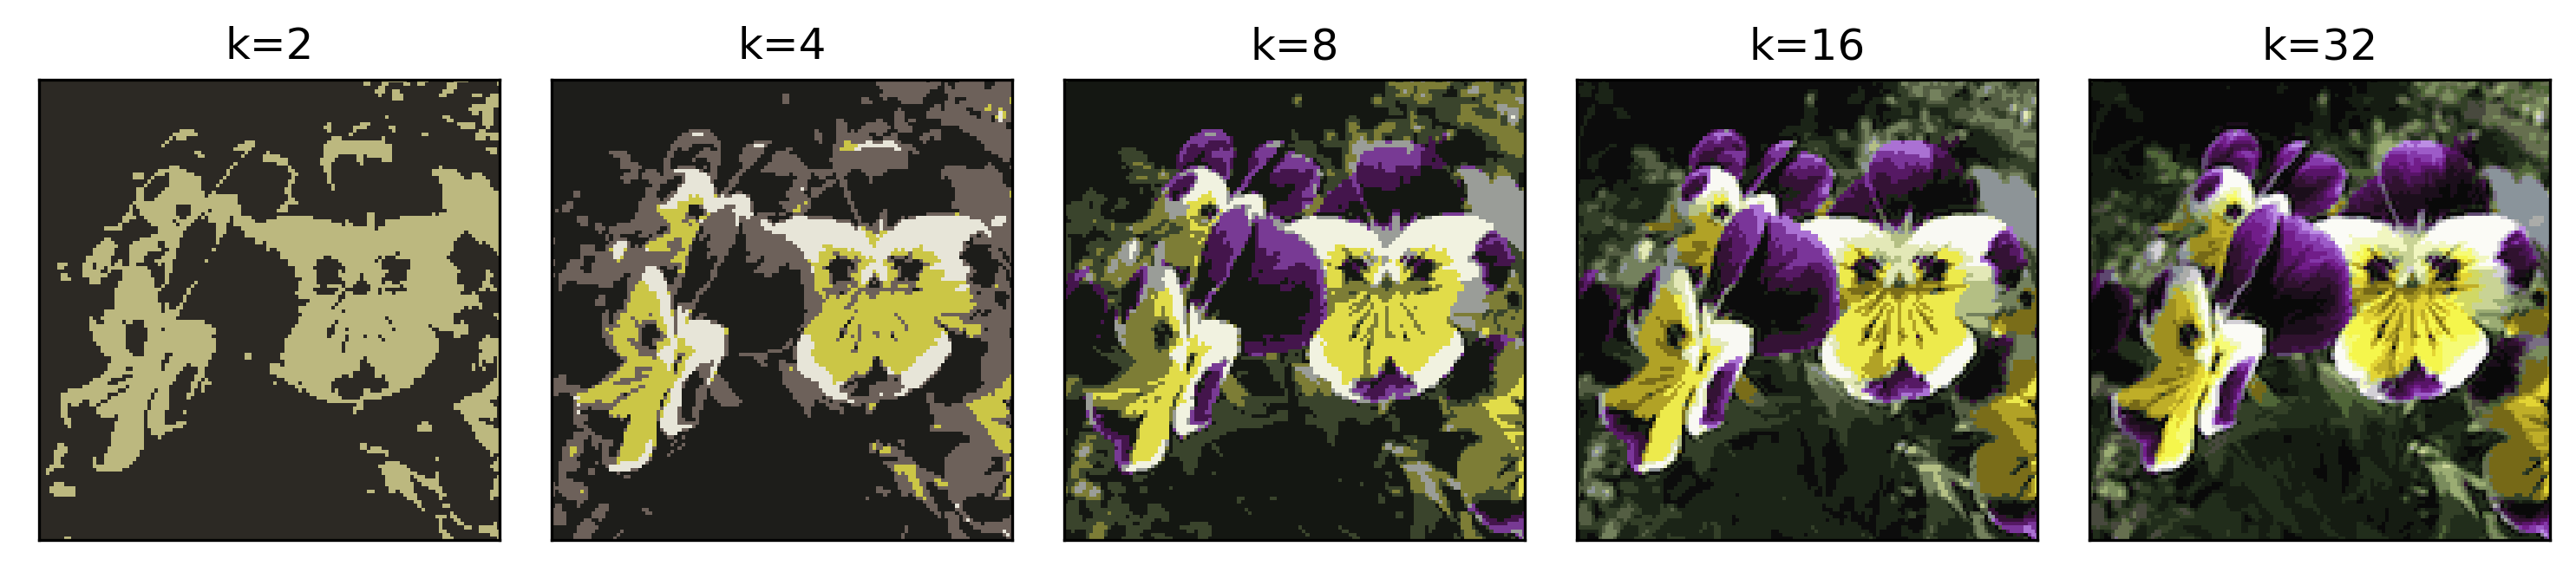

In [23]:
compress(flowers[6])

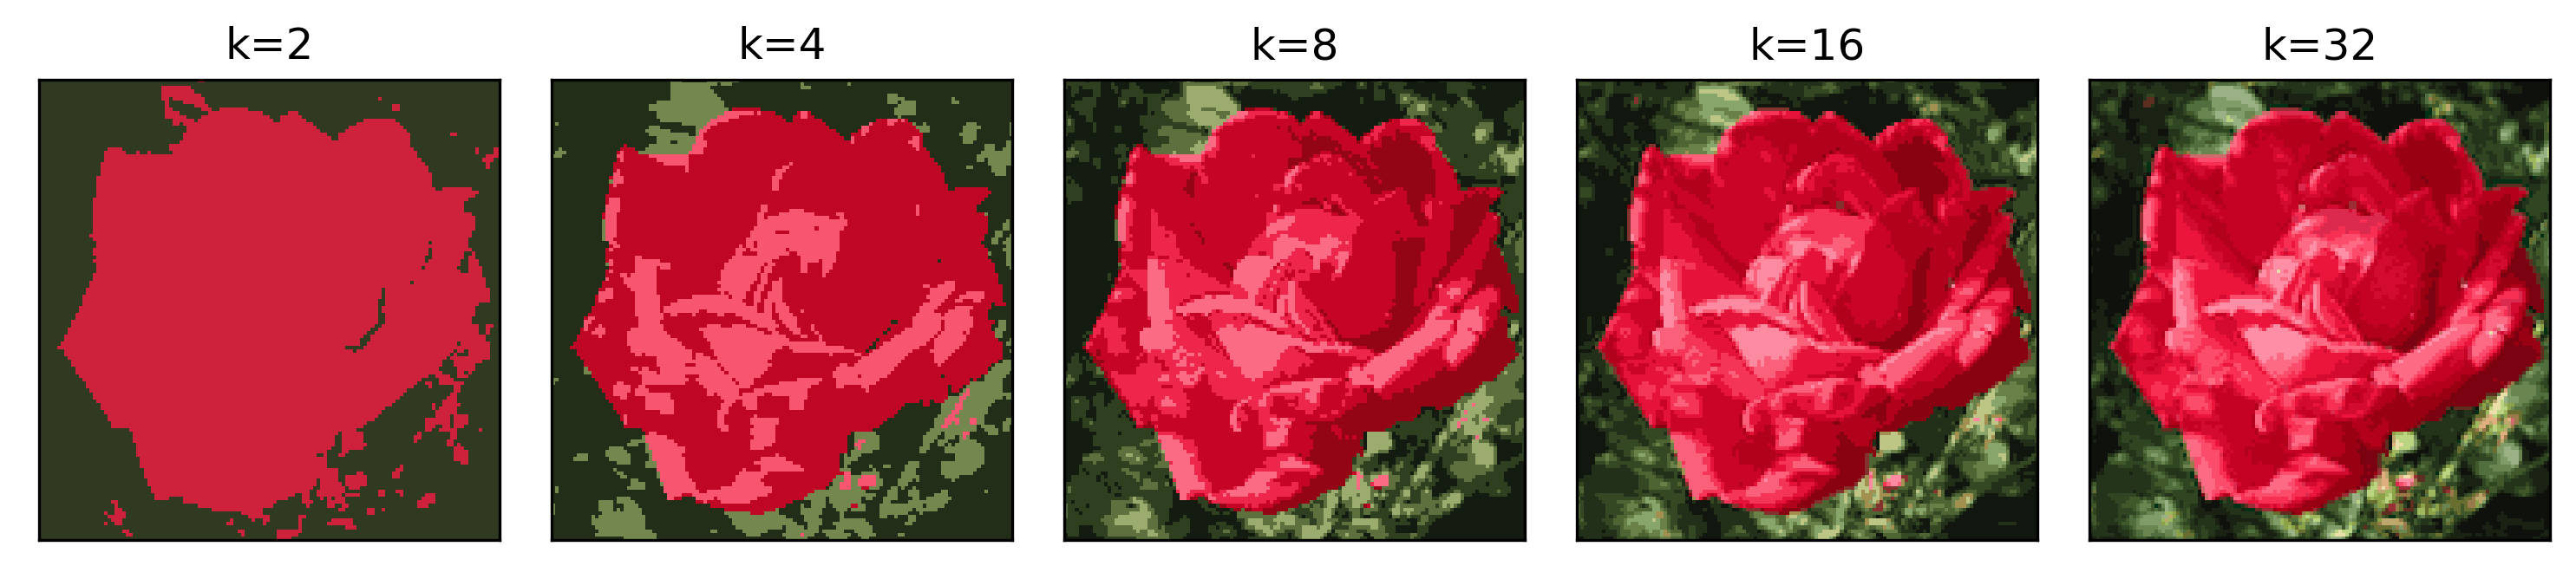

In [24]:
compress(flowers[7])

> Each image demonstrates how k-means can be used to transform the image to have the desired amount of colors prior to compression.

---

***Conclusion***

> k-means has a few applications in image processing. Specifically, it can be valuable for segmentation and compression. Hopefully this exercise gives an idea of how these work.

---

***Next?***

> There are a few things left unaddressed in this demo and the one regarding music. Creating a better example of clustering for data analysis that includes a more robust k-value selection method such as the elbow method could be a valuable exercise. There are also some heuristics and centroid initialization methods to experiment with. More to come!